# TO DO

- **Question 3:** ive found the over rep and under rep but not sure how to plot to get a visual sense? 
- checking the relationship between claim rate and LGA, the correlation matrix is for all LGAs, is this right? The question says to find if there is a relationship between claim rate and a single LGA. 
- **question4 :** I tried the spearman and pearson, but not sure how to apply it. How does this help in comparison to what I did?> 
correllation matrix is good. explan the results (no relationship between the two) 
- **challenge Q:** checking the different ports in SA and QLD. is fixing them apart of the task? 
- readme? 
usually put an expanation that we cannot provide in the code. In the code we will have dataframes / attributes. Good to explain what those are. do not put the analysis or the results n the code. Can put the explanation of why a function was used. 
- CLEAN UP NOTEBOOK, AT MMARKDOWN COMMENTS


check sns galeries of different types of plots, good to see which ones might be applicable to certain data types

# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


In [4]:
seifa[seifa['LGA'] == 'ONKAPARINGA']

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
1392,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,975,ONKAPARINGA
1393,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,672,ONKAPARINGA
1394,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1152,ONKAPARINGA
1395,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,159517,ONKAPARINGA
3648,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,SCORE,Score,993,ONKAPARINGA
3649,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,MINS,Minimum score for SA1s in area,637,ONKAPARINGA
3650,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,MAXS,Maximum score for SA1s in area,1141,ONKAPARINGA
3651,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,URP,Usual resident population,159517,ONKAPARINGA
5904,45340,Onkaparinga (C),IER,Index of Economic Resources,SCORE,Score,996,ONKAPARINGA
5905,45340,Onkaparinga (C),IER,Index of Economic Resources,MINS,Minimum score for SA1s in area,674,ONKAPARINGA


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [5]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [6]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_pop.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,19606.0,19606.0,19606.0,19606.0
ADELAIDE HILLS,38601.0,38601.0,38601.0,38601.0
ALBANY,33614.0,33614.0,33614.0,33614.0
ALBURY,47851.0,47851.0,47851.0,47851.0
ALEXANDRINA,23693.0,23693.0,23693.0,23693.0


In [7]:
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [8]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


We can use the `.describe()` function to get a general idea of what the dataframe looks like

In [9]:
sa_vouchers_scores.describe()

,Participant_ID,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
count,1.275260e+05,127526.000000,127526.000000,118066.000000,118066.000000,118066.000000,118066.000000,118066.000000
mean,1.063764e+06,49.663951,2015.915100,981.049942,981.049942,971.090416,981.756314,68014.296046
std,3.681374e+04,2.700970,0.765087,44.454505,44.454505,56.889280,55.538098,50470.140017
min,1.000002e+06,5.000000,2015.000000,870.000000,870.000000,808.000000,798.000000,871.000000
25%,1.031883e+06,50.000000,2015.000000,955.000000,955.000000,927.000000,937.000000,22070.000000
50%,1.063764e+06,50.000000,2016.000000,974.000000,974.000000,973.000000,987.000000,62912.000000
75%,1.095646e+06,50.000000,2017.000000,1013.000000,1013.000000,997.000000,1018.000000,104922.000000
max,1.127526e+06,50.000000,2017.000000,1083.000000,1083.000000,1090.000000,1096.000000,159517.000000


**Removing any uppercase words for ease of referencing the DF.**

help from https://www.codegrepper.com/code-examples/python/convert+columns+to+lowercase+pandas

In [10]:
# sa_vouchers.index = sa_vouchers.index.str.lower()

# sa_vouchers_scores.index = sa_vouchers_scores.index.str.lower()

# seifa.index = seifa.index.str.lower()

LGA_scores.index = LGA_scores.index.str.lower()

sa_vouchers.columns = sa_vouchers.columns.str.lower()

sa_vouchers_scores.columns = sa_vouchers_scores.columns.str.lower()

seifa.columns = seifa.columns.str.lower()

sa_vouchers.columns = sa_vouchers.columns.str.lower()

LGA_scores.columns = LGA_scores.columns.str.lower()

### failed loop for trying to find the duplicate LGAs with different population size. 

### does what the failed loop was supposed to do 

# Index Definition

From here https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/2033.0.55.001~2016~Main%20Features~IRSAD~20

4 major indexes for every LGA. 

**IRSAD: index of relative socio economic advantage and disadvantage.**
- summarises information about the economic and social conditions of people and households within an area. Includes both relative advantage and disadvantage. 
- low score = greater disadvatange, lack of advantage in general. 
- low scores = many households with low incomes, many people in unskilled occupations. OR few households with high incomes. Few people in skilled occupations. 

**IEO: Index of education and occupation.**
- reflects the educational and occupational level of communities. 
- Education variables in this index show either the level of qualification achieved or wheteher further education is being undertaken. 
- Low score = relatively lower education and occupation status. 
- low score = many people without qualifications or many people in low skilled occuaptions or unemployed. AND few people with high level of qualification or highly skilled occupation. 

**IER: Index of economic resources.**
- focus' on the financial aspects of relative socio-economic advantage and disadvantage. Summarises variables related to income and wealth. 
- low score = relative lack to economic resources in general. 
- low score = many households with low income, or many paying low rent. AND few households with high income, or few owned homes. 

**IRSD: The index of relative socio economic disadvantage.**
- range of information about the economic and social conditions of people and households. 
- low score = relatively greater disadvantage in general. 
- low sore= many households with low income, people with no qualification OR many people in low skill occupations. 

**Local Government Areas - 2011** 
- Cities (C)
- Rural Cities (RC)
- Municipalities/Municipal Councils (M)
- District Councils (DC)
- Regional Councils (RegC)
- Towns (T)
- Aboriginal Councils (AC)

# Question 1

 Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

### setting up the DFs

We know each row means a voucher has been claimed. 

Start off by checking how many unique LGAs there are. Then we can count how many times the LGA occurs. 

In [11]:
len(set(sa_vouchers_scores['participant_lga']))

69

It's quite difficult to use this type of dataframe due to the multi index. We can use `pivot` instead to make it more clear. 

Used help from the textbook for this part. Page 24, section 2.6.8



In [12]:
group = (sa_vouchers_scores.groupby(['participant_lga','voucher_sport']).count()).copy(deep=True)

In [13]:
group.head()

participant_id  participant_suburb  \
participant_lga voucher_sport                                          
ADELAIDE        Athletics                     16                  16   
                Australian Rules             130                 130   
                Baseball                       1                   1   
                Basketball                     4                   4   
                Calisthenics                   1                   1   

                                  club_previous_member  \
participant_lga voucher_sport                            
ADELAIDE        Athletics                           16   
                Australian Rules                   130   
                Baseball                             1   
                Basketball                           4   
                Calisthenics                         1   

                                  participant_atsi_indicator  \
participant_lga voucher_sport                                  
ADELAIDE        Athletics                                 16   
                Australian Rules                         130   
                Baseball                                   1   
                Basketball                                 4   
                Calisthenics                               1   

                                  participant_cald_indicator  participant_sex  \
participant_lga voucher_sport                                                   
ADELAIDE        Athletics                                 16               16   
                Australian Rules                         130              130   
                Baseball                                   1                1   
                Basketball                                 4                4   
                Calisthenics                               1                1   

                                  voucher_value  club_name  \
participant_lga voucher_sport                                
ADELAIDE        Athletics                    16         16   
                Australian Rules            130        130   
                Baseball                      1          1   
                Basketball                    4          4   
                Calisthenics                  1          1   

                                  participant_electorate  \
participant_lga voucher_sport                              
ADELAIDE        Athletics                             16   
                Australian Rules                     130   
                Baseball                               1   
                Basketball                             4   
                Calisthenics                           1   

                                  voucher_completion_date  voucher_claim_year  \
participant_lga voucher_sport                                                   
ADELAIDE        Athletics                              16                  16   
                Australian Rules                      128                 130   
                Baseball                                1                   1   
                Basketball                              4                   4   
                Calisthenics                            1                   1   

                                  ieo  ier  irsad  irsd  population  
participant_lga voucher_sport                                        
ADELAIDE        Athletics          16   16     16    16          16  
                Australian Rules  130  130    130   130         130  
                Baseball            1    1      1     1           1  
                Basketball          4    4      4     4           4  
                Calisthenics        1    1      1     1           1

keeping all rows and only keeping one column. All the columns represent the same number of counts, so we only need to keep one. 

In [14]:
pivot = pd.pivot_table(group, values = 'participant_id', index = 'participant_lga', columns = 'voucher_sport')

In [15]:
pivot.head()

voucher_sport,Archery,Athletics,Australian Rules,BMX,Badminton,Baseball,Basketball,Bowls,Calisthenics,Cricket,...,Surf Riding,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling
participant_lga,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,NaN,16.0,130.0,NaN,NaN,1.0,4.0,NaN,1.0,2.0,...,NaN,NaN,NaN,11.0,4.0,NaN,NaN,NaN,NaN,NaN
ADELAIDE HILLS,3.0,204.0,1412.0,2.0,NaN,11.0,48.0,NaN,62.0,128.0,...,NaN,18.0,3.0,44.0,257.0,2.0,1.0,1.0,NaN,NaN
ADELAIDE PLAINS,NaN,3.0,485.0,NaN,NaN,3.0,15.0,NaN,23.0,3.0,...,NaN,3.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,9.0,62.0,980.0,4.0,3.0,NaN,204.0,NaN,5.0,8.0,...,2.0,11.0,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN
BAROSSA,NaN,158.0,1196.0,3.0,NaN,6.0,341.0,NaN,9.0,56.0,...,NaN,12.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN


In [16]:
pivot = pivot.fillna(0)

Applying the pivot table has drastically aided in the dimensioniality of the DF,m making it easier to explore the DF. I have also changed the NAN values to zero, making the assumption that the nan values represent no voucher redeemed. 

Let's try some plots with this new df now. 

In [17]:
pivot.index = pivot.index.str.lower()
pivot.columns = pivot.columns.str.lower()

### normallising

how much of vouchers do these sports cover for the overall vouchers claimed? 

because the least popular sports don't have many claims, it would be justifiable to not inclue it in the rest of the analysis for this part. 

would normalising this help? just the dist of vouchers, normalise would be comnparing to the total voucher claims. 

comparing LGAs, would be better to normalise by each of their popuulations. BEcause comparing one LGA which mnight have a large population won't be a fair comparison. 

If we don't know how the vouchers were distributed, better to normlaise with respect to the total vouchers claimed rather than by the population because there could be 2 vouchers per person. 

We want
- the total number of vouchers claimed for all LGAs combined. 
- how the total of vouchers clamed for a specific sport compares to the total clamed
- what does this telll us? 

we know the total number of vouchers clamed is the number of rows in sa_vouchers_scores.

The total vouchers claimed for all sports:

In [18]:
claimDF = pivot.sum().to_frame(name='sum')

In [19]:
claimDF['proportion'] =claimDF['sum'] / claimDF.sum()[0]


checking the mean of the proportion alllows us to see an upper vs lower half of the sports clami rate

with my previous method for find the topSports was using `.idxmax()`. But that function does not take into consideration the proportion, simply the number of vouchers claimed. So we should update the topSports with ths new code

In [20]:
topSports = list(claimDF['proportion'].nlargest(5).index)

In [21]:
botSports = list(claimDF['proportion'].nsmallest(5).index)

Making the same previous plot with our update values. 

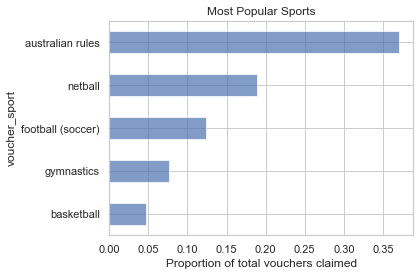

In [22]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


claimDF['proportion'][topSports].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Most Popular Sports')

plt.xlabel('Proportion of total vouchers claimed')
plt.tight_layout()
plt.show()

Least popular sports have been excluded as there are not many claims. Instead, let's group them as an 'other' sport 

In [23]:
topSportsDF= claimDF.loc[topSports]

In [24]:
otherSportsDF = claimDF.loc[~claimDF.index.isin(topSports)].sum(axis=0).to_frame().T

In [25]:
sportsClaim = pd.concat([topSportsDF, otherSportsDF])

In [26]:
sportsClaim = sportsClaim.rename(index={0:'other'})

In [27]:
sportsClaim['percentage'] = round(sportsClaim['proportion']*100, 2)

In [28]:
sportsClaim

,sum,proportion,percentage
australian rules,47224.0,0.370309,37.03
netball,24017.0,0.188330,18.83
football (soccer),15775.0,0.123700,12.37
gymnastics,9823.0,0.077027,7.70
basketball,6016.0,0.047175,4.72
other,24671.0,0.193459,19.35


In [29]:
sportsClaim['percentage'].sum()

100.0

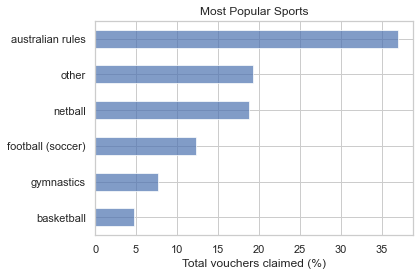

In [30]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


sportsClaim['percentage'].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Most Popular Sports')

plt.xlabel('Total vouchers claimed (%)')

plt.tight_layout()
plt.show()

We can see Australian Rules and Netball are the most popular, badminton being the least popular found in botSports. We expect this as we know most Australians play these popular sports growing up. Other factors that can be included may be the regions in which these sports are played. Some LGAs may have a higher voucher claim rate for a less popular sport than others. We were able to show the most popular sports across all LGAs, though there may be some LGAs where these top sports are not popular. 

Checking the proportion of vouchers claimed in the top LGAs:

### normalisnig in each LGA

In [31]:
lgaClaim = pivot.sum(axis=1).to_frame(name='sum')

In [32]:
lgaClaim['population'] = LGA_scores['population']

In [33]:
NANpopulation = list(lgaClaim[lgaClaim['population'].isna()].index)

We can drop the NANpopulation because it is only a small number of vouchers (approx. 600) compared to the total vouchers (approx. 130000). We want to drop the NANpopulation because these represent LGAs that were originally in the sa_vouchers DF but not in the sefa DF. 

Dropping NANpopulation should not have an adverse effect on the rest of the data.  

In [34]:
lgaClaim = lgaClaim.drop(NANpopulation)

In [35]:
lgaClaim['proportion'] = lgaClaim['sum']/ lgaClaim['population']

In [36]:
lgaClaim

,sum,population,proportion
participant_lga,,,
adelaide,302.0,19606.0,0.015403
adelaide hills,4756.0,38601.0,0.123209
alexandrina,2979.0,23693.0,0.125733
barossa,2874.0,22174.0,0.129611
barunga west,333.0,2467.0,0.134982
...,...,...,...
west torrens,2844.0,54932.0,0.051773
whyalla,2488.0,22070.0,0.112732
wudinna,267.0,1256.0,0.212580


In [37]:
lgaClaim['proportion'].nlargest(5)

participant_lga
karoonda east murray    0.374879
kimba                   0.213431
wudinna                 0.212580
cleve                   0.190283
southern mallee         0.163090
Name: proportion, dtype: float64

In [38]:
topLGAs = list(lgaClaim['proportion'].nlargest(5).index)

We can use the following code if we want to put alll LGAs (except the top5 ) in an 'other' row. I don't think we would want to do this because a lot of information would be lost in this process. For example, the 6th - 10th top LGAs would have a significant contribution to the values in the 'other' row. 

In [39]:
topLGAsClaim = lgaClaim.loc[topLGAs]

In [40]:
topLGAsClaim['percentage'] = round(lgaClaim['proportion']*100,2)

In [41]:
lgaClaim

,sum,population,proportion
participant_lga,,,
adelaide,302.0,19606.0,0.015403
adelaide hills,4756.0,38601.0,0.123209
alexandrina,2979.0,23693.0,0.125733
barossa,2874.0,22174.0,0.129611
barunga west,333.0,2467.0,0.134982
...,...,...,...
west torrens,2844.0,54932.0,0.051773
whyalla,2488.0,22070.0,0.112732
wudinna,267.0,1256.0,0.212580


In [42]:
topLGAsClaim

,sum,population,proportion,percentage
participant_lga,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49
kimba,232.0,1087.0,0.213431,21.34
wudinna,267.0,1256.0,0.212580,21.26
cleve,329.0,1729.0,0.190283,19.03
southern mallee,342.0,2097.0,0.163090,16.31


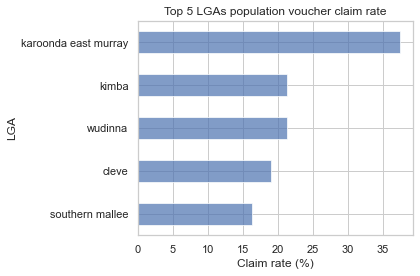

In [43]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


ax = topLGAsClaim['percentage'].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Top 5 LGAs population voucher claim rate')

ax.set(ylabel= 'LGA')

plt.xlabel('Claim rate (%)')

plt.tight_layout()
plt.show()

37.5% of Karoonda east murray has claimed a voucher. The proportion i ssignificantly higher compared to the other topLGAs, though it's population is also very small. We saw in the DF lgaClaim that this LGA only had a total of 388 vouchers claimed. Below we will see the majority of the claims are in the topSports list. 

In [44]:
pivot.loc['karoonda east murray'].sort_values(ascending=False)[topSports]

voucher_sport
australian rules     169.0
netball              100.0
football (soccer)     18.0
gymnastics            22.0
basketball             7.0
Name: karoonda east murray, dtype: float64

### Australian rules single stacked bar plot with top 10 LGAs and 'other' LGAs 

We would need the total claims, top 10 lgas for more lgas on the bar chart. 5 covered about 12000, total of roughly 50k. 

In [45]:
topLGAs2 = list(pivot['australian rules'].nlargest(10).index)

In [46]:
otherSports2DF = pivot['australian rules'].loc[~pivot.index.isin(topLGAs2)].to_frame()

In [47]:
otherSports2DF['proportion'] =(otherSports2DF['australian rules'] / pivot['australian rules'].sum())

In [48]:
aflTop = pivot['australian rules'].loc[topLGAs2].to_frame()

In [49]:
# aflTop['population'] = LGA_scores['population']

In [50]:
aflTop['proportion'] = aflTop['australian rules'] / pivot['australian rules'].sum()

In [51]:
aflTop = aflTop.T

In [52]:
aflTop['other'] = otherSports2DF.sum()

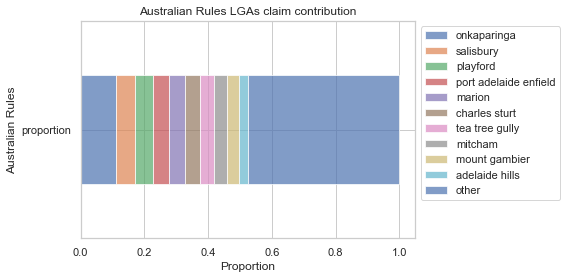

In [53]:
sns.set_theme(style="whitegrid")
# fig = plt.figsize=(12, 5)
# plt.figure(figsize=(15,5))

# ax = aflTop_prop['proportion'].sort_values().plot(kind = 'barh',stacked=True,style='b', 
#                     alpha=0.7,title='Australian Rules LGAs claim contribution', figsize=(15,5))

ax = aflTop.drop(index='australian rules').plot(kind = 'barh',stacked=True,style='b', 
                    alpha=0.7,title='Australian Rules LGAs claim contribution')


plt.legend(bbox_to_anchor=(1, 1))
ax.set(ylabel='Australian Rules', xlabel = 'Proportion')

plt.show()

check 2d matrix, our data is 2d so check different 2d plots, see what they look like. 

normalisation for this df would involve proportion to the population of each lga 

OR

divide the values by the sum of each column to get the percentage of claim for each sport in each lga. (easier method)

# Question 2

Are some sports more popular in different parts of the state?

to check what types of sports are popular in different parts of the state: 

- what sports are most popular for each LGA 
- can check the proportion of the topSports in each LGA, will show how they won't be the same shape. That is aussie rules might be less popular in one compared to gymnastics

In [54]:
netball = pivot['netball'].sort_values().nlargest(5)
gymnastics =pivot['gymnastics'].sort_values().nlargest(5)
soccer= pivot['football (soccer)'].sort_values().nlargest(5)
afl= pivot['australian rules'].sort_values().nlargest(5)
basketball = pivot['basketball'].sort_values().nlargest(5)

In [55]:
list1 = list(netball.index.values)
list2 = list(gymnastics.index.values)
list3 = list(soccer.index.values)
list4 = list(afl.index.values)
list5 = list(basketball.index.values)

# mylist = list1.concatenate([list2, list3, list4, list5])

In [56]:
set(list1)

{'adelaide hills', 'mount barker', 'onkaparinga', 'playford', 'tea tree gully'}

In [57]:
topSports_lgaList = list(set(np.concatenate([list1, list2,list3,list4,list5])))

dropping duplicates https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

### claim rate proportion with population

So I want to change these values to their proportions. 

In [58]:
topClaims = pivot[topSports].loc[set(topSports_lgaList)]
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
port augusta,119.0,765.0,111.0,10.0,364.0
salisbury,2856.0,566.0,2069.0,763.0,362.0
charles sturt,2147.0,584.0,917.0,807.0,256.0
port adelaide enfield,2453.0,630.0,853.0,627.0,243.0
barossa,1196.0,445.0,197.0,117.0,341.0
playford,2580.0,904.0,1880.0,451.0,111.0
tea tree gully,2131.0,1068.0,1356.0,1114.0,284.0
naracoorte lucindale,257.0,165.0,57.0,0.0,364.0
whyalla,569.0,509.0,268.0,154.0,605.0


In [59]:
topClaims['population'] = LGA_scores['population']

In [60]:
topClaims['total'] = pivot.sum(axis=1) / topClaims['population']

In [61]:
topClaims['other'] = pivot.loc[:, ~pivot.columns.isin(topSports)].sum(axis=1).to_frame()

help with `.apply()` from https://appdividend.com/2020/03/05/python-pandas-how-to-apply-formula-to-entire-column-and-row/

In [62]:
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,population,total,other
participant_lga,,,,,,,,
port augusta,119.0,765.0,111.0,10.0,364.0,13978.0,0.108885,153.0
salisbury,2856.0,566.0,2069.0,763.0,362.0,129067.0,0.063293,1553.0
charles sturt,2147.0,584.0,917.0,807.0,256.0,104922.0,0.065735,2186.0
port adelaide enfield,2453.0,630.0,853.0,627.0,243.0,112797.0,0.056597,1578.0
barossa,1196.0,445.0,197.0,117.0,341.0,22174.0,0.129611,578.0
playford,2580.0,904.0,1880.0,451.0,111.0,79082.0,0.087757,1014.0
tea tree gully,2131.0,1068.0,1356.0,1114.0,284.0,95461.0,0.075623,1266.0
naracoorte lucindale,257.0,165.0,57.0,0.0,364.0,NaN,NaN,254.0
whyalla,569.0,509.0,268.0,154.0,605.0,22070.0,0.112732,383.0


In [63]:
newDF = topClaims.apply(lambda a: a/topClaims['population'] )[topSports]

In [64]:
newDF

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
port augusta,0.008513,0.054729,0.007941,0.000715,0.026041
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805
charles sturt,0.020463,0.005566,0.008740,0.007691,0.002440
port adelaide enfield,0.021747,0.005585,0.007562,0.005559,0.002154
barossa,0.053937,0.020069,0.008884,0.005276,0.015378
playford,0.032624,0.011431,0.023773,0.005703,0.001404
tea tree gully,0.022323,0.011188,0.014205,0.011670,0.002975
naracoorte lucindale,NaN,NaN,NaN,NaN,NaN
whyalla,0.025782,0.023063,0.012143,0.006978,0.027413


In [65]:
topClaims[topSports] = newDF[topSports]

In [66]:
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,population,total,other
participant_lga,,,,,,,,
port augusta,0.008513,0.054729,0.007941,0.000715,0.026041,13978.0,0.108885,153.0
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,129067.0,0.063293,1553.0
charles sturt,0.020463,0.005566,0.008740,0.007691,0.002440,104922.0,0.065735,2186.0
port adelaide enfield,0.021747,0.005585,0.007562,0.005559,0.002154,112797.0,0.056597,1578.0
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,22174.0,0.129611,578.0
playford,0.032624,0.011431,0.023773,0.005703,0.001404,79082.0,0.087757,1014.0
tea tree gully,0.022323,0.011188,0.014205,0.011670,0.002975,95461.0,0.075623,1266.0
naracoorte lucindale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0
whyalla,0.025782,0.023063,0.012143,0.006978,0.027413,22070.0,0.112732,383.0


In [67]:
topClaims['other'] = topClaims['other'] / topClaims['population']

In [68]:
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,population,total,other
participant_lga,,,,,,,,
port augusta,0.008513,0.054729,0.007941,0.000715,0.026041,13978.0,0.108885,0.010946
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,129067.0,0.063293,0.012033
charles sturt,0.020463,0.005566,0.008740,0.007691,0.002440,104922.0,0.065735,0.020835
port adelaide enfield,0.021747,0.005585,0.007562,0.005559,0.002154,112797.0,0.056597,0.013990
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,22174.0,0.129611,0.026067
playford,0.032624,0.011431,0.023773,0.005703,0.001404,79082.0,0.087757,0.012822
tea tree gully,0.022323,0.011188,0.014205,0.011670,0.002975,95461.0,0.075623,0.013262
naracoorte lucindale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whyalla,0.025782,0.023063,0.012143,0.006978,0.027413,22070.0,0.112732,0.017354


In [69]:
topClaims.columns

Index(['australian rules', 'netball', 'football (soccer)', 'gymnastics',
       'basketball', 'population', 'total', 'other'],
      dtype='object', name='voucher_sport')

rearranging the order of the columns. Specifically, changng the order of the last three columns. 

In [70]:
columnsList = list(topClaims.columns[:-3])

In [71]:
columnsList.extend(['other','total','population'])

In [72]:
columnsList

['australian rules',
 'netball',
 'football (soccer)',
 'gymnastics',
 'basketball',
 'other',
 'total',
 'population']

In [73]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,population,total,other
participant_lga,,,,,,,,
port augusta,0.008513,0.054729,0.007941,0.000715,0.026041,13978.0,0.108885,0.010946
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,129067.0,0.063293,0.012033
charles sturt,0.020463,0.005566,0.008740,0.007691,0.002440,104922.0,0.065735,0.020835
port adelaide enfield,0.021747,0.005585,0.007562,0.005559,0.002154,112797.0,0.056597,0.013990
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,22174.0,0.129611,0.026067


In [74]:
topClaims = topClaims.reindex(columns = columnsList)

In [75]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total,population
participant_lga,,,,,,,,
port augusta,0.008513,0.054729,0.007941,0.000715,0.026041,0.010946,0.108885,13978.0
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,0.012033,0.063293,129067.0
charles sturt,0.020463,0.005566,0.008740,0.007691,0.002440,0.020835,0.065735,104922.0
port adelaide enfield,0.021747,0.005585,0.007562,0.005559,0.002154,0.013990,0.056597,112797.0
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,0.026067,0.129611,22174.0


Checking to see the total column is correct. Essentially checking the entire process we've done to topClaims was done correctly.

The False value represents the NANs in the DF. We will remove them because they do not exist in the `LGA_scores` DF

In [76]:
round(topClaims[topSports].sum(axis=1) + topClaims['other'], 2) == round(topClaims['total'],2)

participant_lga
port augusta              True
salisbury                 True
charles sturt             True
port adelaide enfield     True
barossa                   True
playford                  True
tea tree gully            True
naracoorte lucindale     False
whyalla                   True
mount barker              True
adelaide hills            True
onkaparinga               True
marion                    True
dtype: bool

In [77]:
topClaims = topClaims.drop(['population'], axis=1)

In [78]:
topClaims = topClaims.dropna()

We can see now therer are no more NAN values

In [79]:
set(round(topClaims[topSports].sum(axis=1) + topClaims['other'], 2) == round(topClaims['total'],2))

{True}

<AxesSubplot:xlabel='voucher_sport', ylabel='participant_lga'>

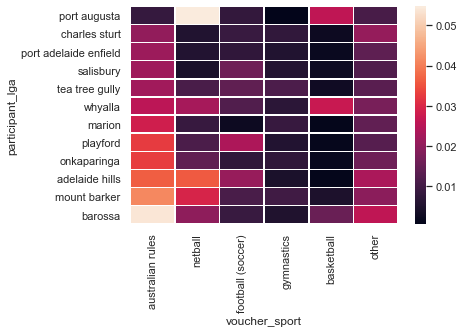

In [80]:
sns.heatmap(data= topClaims.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

from this, we can see that even though the topSports are most popular, there arre still instances when the other sports have quite a high claim rate. Austrralian rules is not popullar in port augusta, but netball and basketball are. We also see that in charles sturt, the other sports are as popular as australan rules. 

A better representation of the above heatmap would be wiith a stacked bar plot. 

In [81]:
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
port augusta,0.008513,0.054729,0.007941,0.000715,0.026041,0.010946,0.108885
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,0.012033,0.063293
charles sturt,0.020463,0.005566,0.008740,0.007691,0.002440,0.020835,0.065735
port adelaide enfield,0.021747,0.005585,0.007562,0.005559,0.002154,0.013990,0.056597
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,0.026067,0.129611
playford,0.032624,0.011431,0.023773,0.005703,0.001404,0.012822,0.087757
tea tree gully,0.022323,0.011188,0.014205,0.011670,0.002975,0.013262,0.075623
whyalla,0.025782,0.023063,0.012143,0.006978,0.027413,0.017354,0.112732
mount barker,0.041267,0.029524,0.011172,0.009864,0.004932,0.019627,0.116386


check the top k proportions. sort by proportion then select the top ten values. possible to sort each column by its own values without touching the other columns. 

normallise to the total claims instead of proportion with the population. 

In [82]:
topClaims.drop(columns='total').sort_values(by= 'australian rules', ascending = False)

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other
participant_lga,,,,,,
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,0.026067
mount barker,0.041267,0.029524,0.011172,0.009864,0.004932,0.019627
adelaide hills,0.036579,0.036139,0.021036,0.004559,0.001243,0.023652
onkaparinga,0.032962,0.014055,0.007548,0.007592,0.001856,0.016117
playford,0.032624,0.011431,0.023773,0.005703,0.001404,0.012822
marion,0.028456,0.008710,0.002446,0.008662,0.001217,0.014252
whyalla,0.025782,0.023063,0.012143,0.006978,0.027413,0.017354
tea tree gully,0.022323,0.011188,0.014205,0.011670,0.002975,0.013262
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,0.012033


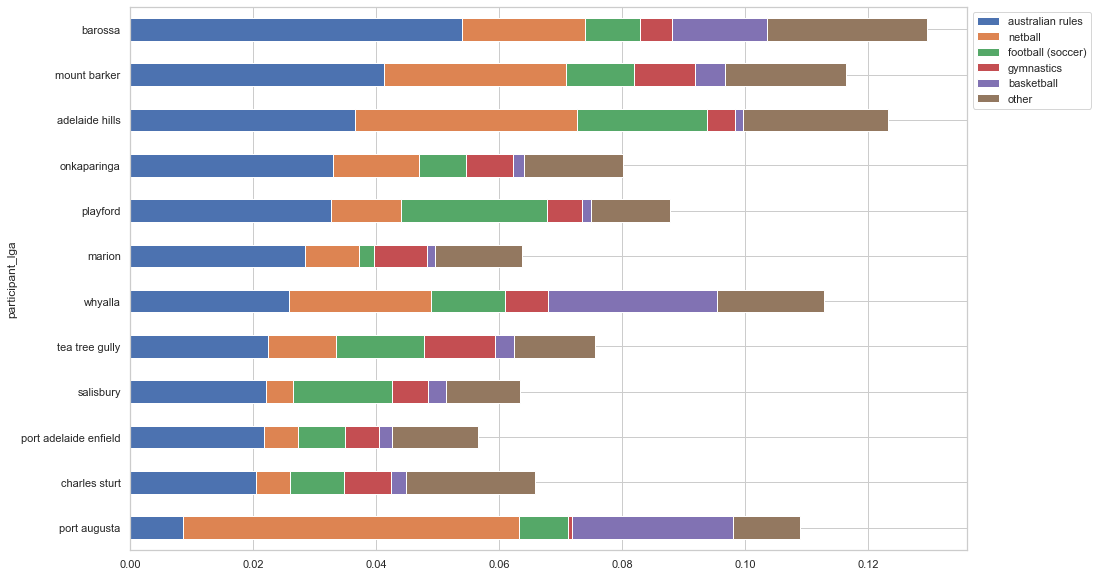

In [83]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### proportion with total claims of LGAs wth highest total claims

In [84]:
topClaims = pivot[topSports].loc[set(topSports_lgaList)]
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
port augusta,119.0,765.0,111.0,10.0,364.0
salisbury,2856.0,566.0,2069.0,763.0,362.0
charles sturt,2147.0,584.0,917.0,807.0,256.0
port adelaide enfield,2453.0,630.0,853.0,627.0,243.0
barossa,1196.0,445.0,197.0,117.0,341.0
playford,2580.0,904.0,1880.0,451.0,111.0
tea tree gully,2131.0,1068.0,1356.0,1114.0,284.0
naracoorte lucindale,257.0,165.0,57.0,0.0,364.0
whyalla,569.0,509.0,268.0,154.0,605.0


In [85]:
topClaims['other'] = pivot.loc[:, ~pivot.columns.isin(topSports)].sum(axis=1).to_frame()

In [86]:
topClaims['total'] = topClaims.sum(axis=1)

In [87]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
port augusta,119.0,765.0,111.0,10.0,364.0,153.0,1522.0
salisbury,2856.0,566.0,2069.0,763.0,362.0,1553.0,8169.0
charles sturt,2147.0,584.0,917.0,807.0,256.0,2186.0,6897.0
port adelaide enfield,2453.0,630.0,853.0,627.0,243.0,1578.0,6384.0
barossa,1196.0,445.0,197.0,117.0,341.0,578.0,2874.0


In [88]:
topClaims = topClaims.apply(lambda a: a/topClaims['total'] )

In [89]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
port augusta,0.078187,0.502628,0.072930,0.006570,0.239159,0.100526,1.0
salisbury,0.349614,0.069286,0.253275,0.093402,0.044314,0.190109,1.0
charles sturt,0.311295,0.084674,0.132956,0.117007,0.037118,0.316949,1.0
port adelaide enfield,0.384242,0.098684,0.133615,0.098214,0.038064,0.247180,1.0
barossa,0.416145,0.154836,0.068546,0.040710,0.118650,0.201113,1.0


<AxesSubplot:xlabel='voucher_sport', ylabel='participant_lga'>

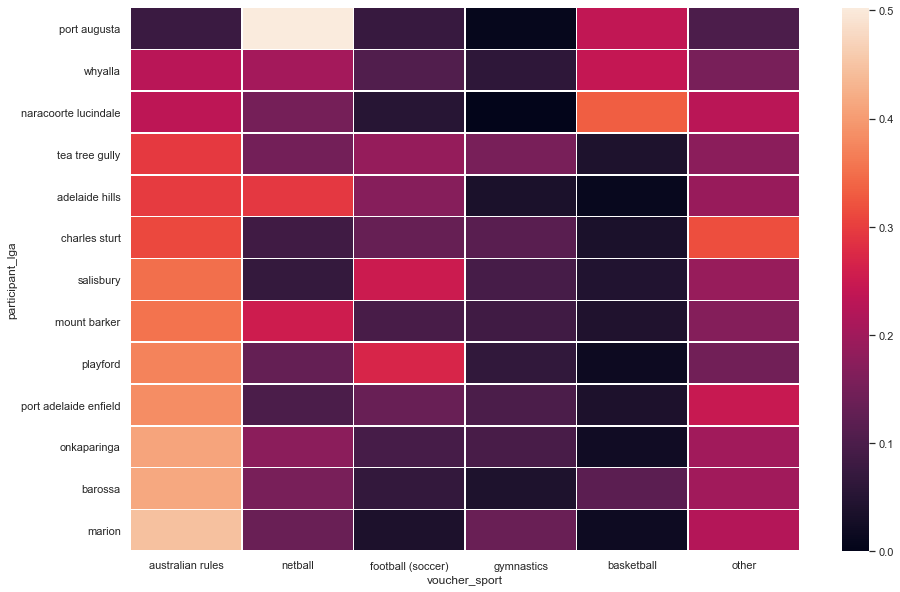

In [90]:
sns.heatmap(data= topClaims.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

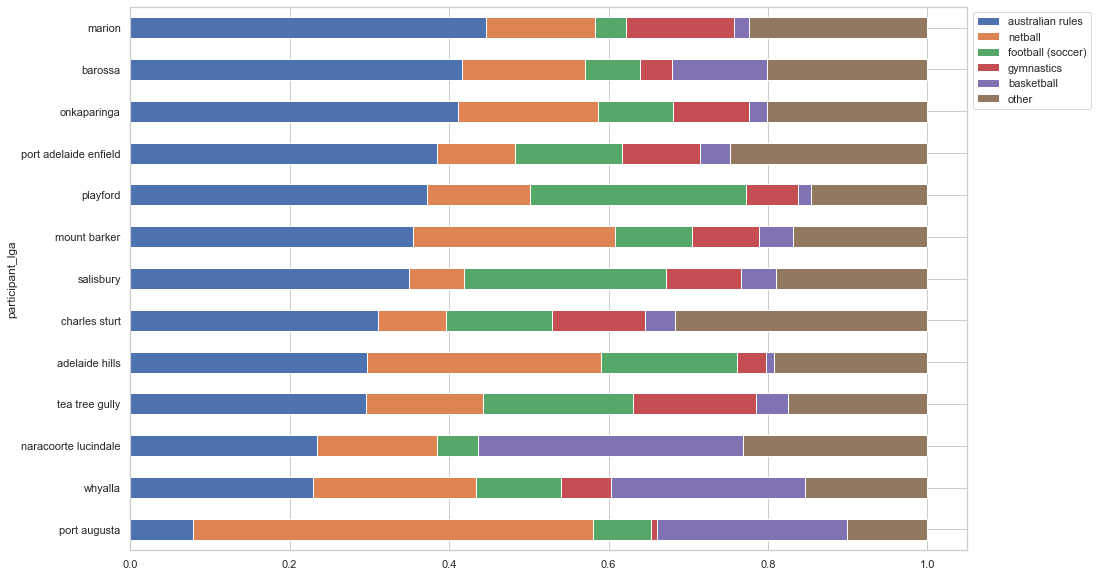

In [91]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### proportion wth total claims of the LGAs wiith the highest claim rates as seen in `topLGAs` from Q1

In [92]:
test = pivot[topSports]

In [93]:
test['other'] =  pivot.loc[:, ~pivot.columns.isin(topSports)].sum(axis=1).to_frame().copy(deep=True)

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
test['total'] = test.sum(axis=1)

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
test

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
adelaide,130.0,23.0,27.0,20.0,4.0,98.0,302.0
adelaide hills,1412.0,1395.0,812.0,176.0,48.0,913.0,4756.0
adelaide plains,485.0,160.0,93.0,18.0,15.0,128.0,899.0
alexandrina,980.0,860.0,510.0,86.0,204.0,339.0,2979.0
barossa,1196.0,445.0,197.0,117.0,341.0,578.0,2874.0
...,...,...,...,...,...,...,...
west torrens,907.0,268.0,425.0,386.0,70.0,788.0,2844.0
whyalla,569.0,509.0,268.0,154.0,605.0,383.0,2488.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0,267.0


In [96]:
test = test.apply(lambda a: a/test['total'] )

In [97]:
test

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
adelaide,0.430464,0.076159,0.089404,0.066225,0.013245,0.324503,1.0
adelaide hills,0.296888,0.293314,0.170732,0.037006,0.010093,0.191968,1.0
adelaide plains,0.539488,0.177976,0.103448,0.020022,0.016685,0.142380,1.0
alexandrina,0.328969,0.288687,0.171198,0.028869,0.068479,0.113797,1.0
barossa,0.416145,0.154836,0.068546,0.040710,0.118650,0.201113,1.0
...,...,...,...,...,...,...,...
west torrens,0.318917,0.094233,0.149437,0.135724,0.024613,0.277075,1.0
whyalla,0.228698,0.204582,0.107717,0.061897,0.243167,0.153939,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0


In [98]:
netball2 = test['netball'].nlargest(5)
gymnastics2 = test['gymnastics'].nlargest(5)
soccer2= test['football (soccer)'].nlargest(5)
afl2= test['australian rules'].nlargest(5)
basketball2 = test['basketball'].nlargest(5)

In [99]:
list1 = list(netball2.index.values)
list2 = list(gymnastics2.index.values)
list3 = list(soccer2.index.values)
list4 = list(afl2.index.values)
list5 = list(basketball2.index.values)

In [100]:
list1

['kimba', 'wudinna', 'flinders ranges', 'streaky bay', 'barunga west']

In [101]:
topSports_lgaList2 = list(set(np.concatenate([list1, list2,list3,list4,list5])))

In [102]:
topSports_lgaList2

['port augusta',
 'victor harbor',
 'peterborough',
 'northern areas',
 'whyalla',
 'kimba',
 'roxby downs',
 'marion',
 'flinders ranges',
 'salisbury',
 'port pirie',
 'naracoorte lucindale',
 'barunga west',
 'streaky bay',
 'playford',
 'tea tree gully',
 'elliston',
 'coober pedy',
 'wudinna',
 'west torrens',
 'cleve',
 'murray bridge',
 'tumby bay']

In [103]:
test = test.loc[topSports_lgaList2]

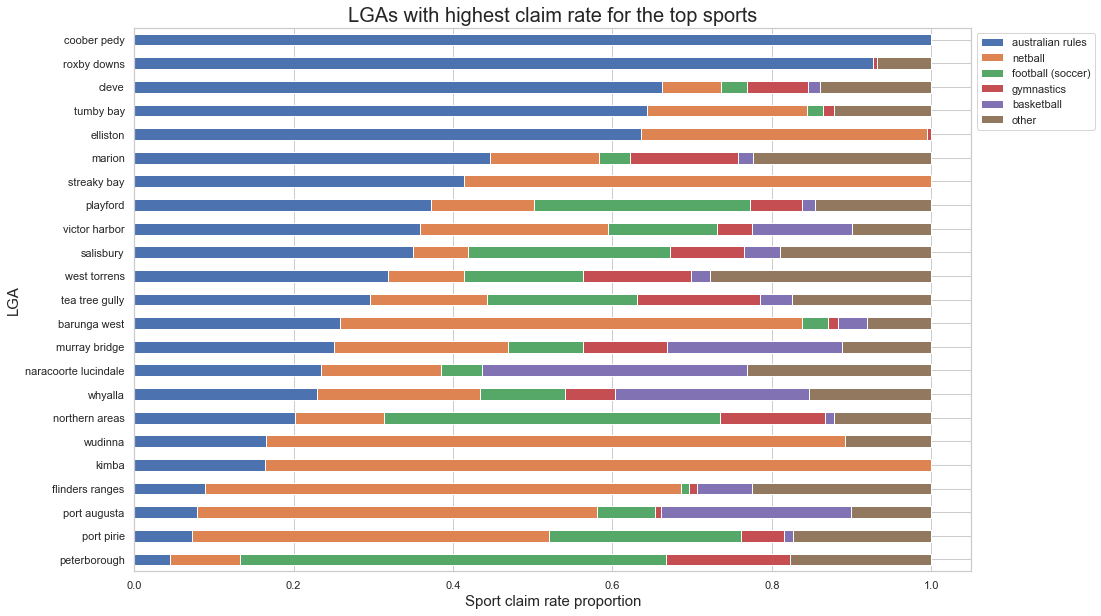

In [104]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


test.drop(columns='total').sort_values('australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.title('LGAs with highest claim rate for the top sports', size = 20)
plt.xlabel('Sport claim rate proportion', size = 15)
plt.ylabel('LGA', size=15)

plt.show()

### top 5 LGAs claim rate for top sports 

In [105]:
topClaims5 = pivot[topSports].loc[topLGAs]

In [106]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0
kimba,38.0,194.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0
cleve,218.0,24.0,11.0,25.0,5.0
southern mallee,158.0,109.0,1.0,6.0,0.0


In [107]:
topClaims5['other'] = pivot.loc[:, ~pivot.columns.isin(topSports)].sum(axis=1).to_frame()

In [108]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other
participant_lga,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0


In [109]:
topClaims5['total'] = topClaims5.sum(axis=1)

In [110]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0,388.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0,232.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0,267.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0,329.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0,342.0


In [111]:
topClaims5 = topClaims5.apply(lambda a: a/topClaims5['total'] )

In [112]:
topClaims5.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0


<AxesSubplot:xlabel='voucher_sport', ylabel='participant_lga'>

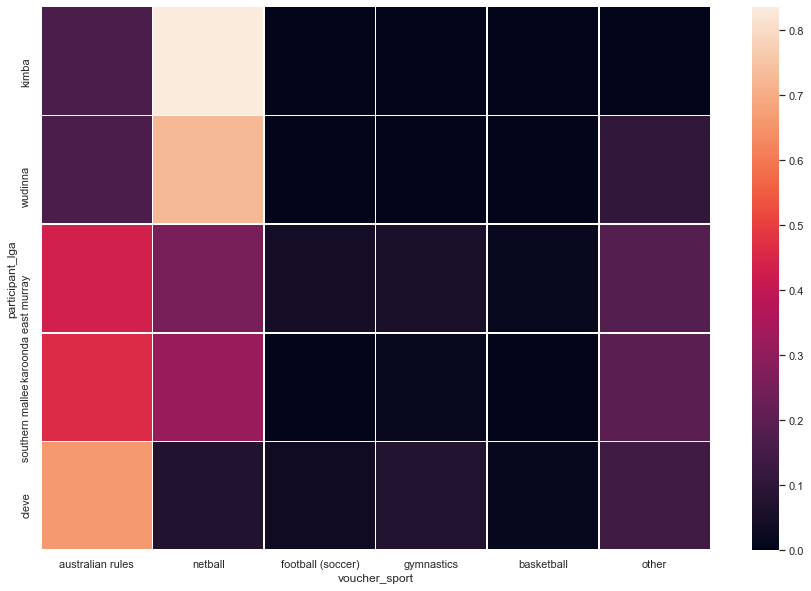

In [113]:
sns.heatmap(data= topClaims5.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

In [114]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0


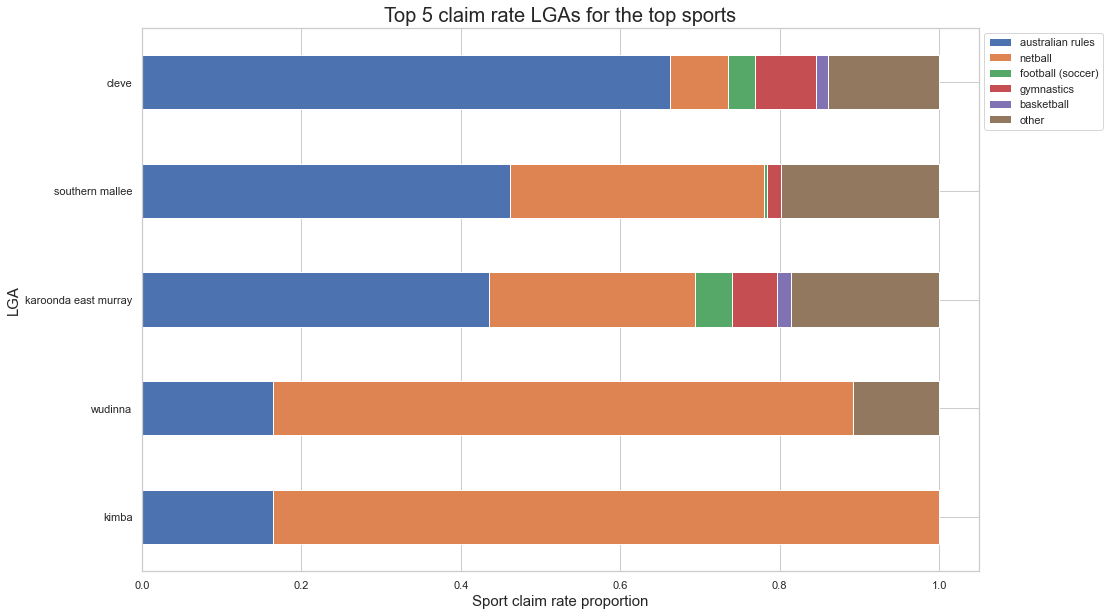

In [115]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims5.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.title('Top 5 claim rate LGAs for the top sports', size = 20)
plt.xlabel('Sport claim rate proportion', size = 15)
plt.ylabel('LGA', size=15)

plt.show()

### top 10 LGAs claim rate for top sports

In [116]:
topLGAs10 = list(lgaClaim['proportion'].nlargest(10).index)

In [117]:
topClaims10 = pivot[topSports].loc[topLGAs10]

In [118]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0
kimba,38.0,194.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0
cleve,218.0,24.0,11.0,25.0,5.0
southern mallee,158.0,109.0,1.0,6.0,0.0
tatiara,310.0,454.0,0.0,0.0,122.0
elliston,105.0,59.0,0.0,1.0,0.0
orroroo/carrieton,53.0,50.0,0.0,8.0,0.0
clare and gilbert valleys,831.0,420.0,8.0,9.0,50.0


In [119]:
topClaims10['other'] = pivot.loc[:, ~pivot.columns.isin(topSports)].sum(axis=1).to_frame()

In [120]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other
participant_lga,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0
tatiara,310.0,454.0,0.0,0.0,122.0,162.0
elliston,105.0,59.0,0.0,1.0,0.0,0.0
orroroo/carrieton,53.0,50.0,0.0,8.0,0.0,26.0
clare and gilbert valleys,831.0,420.0,8.0,9.0,50.0,31.0


In [121]:
topClaims10['total'] = topClaims10.sum(axis=1)

In [122]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0,388.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0,232.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0,267.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0,329.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0,342.0
tatiara,310.0,454.0,0.0,0.0,122.0,162.0,1048.0
elliston,105.0,59.0,0.0,1.0,0.0,0.0,165.0
orroroo/carrieton,53.0,50.0,0.0,8.0,0.0,26.0,137.0
clare and gilbert valleys,831.0,420.0,8.0,9.0,50.0,31.0,1349.0


In [123]:
topClaims10 = topClaims10.apply(lambda a: a/topClaims10['total'] )

In [124]:
topClaims10.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0


<AxesSubplot:xlabel='voucher_sport', ylabel='participant_lga'>

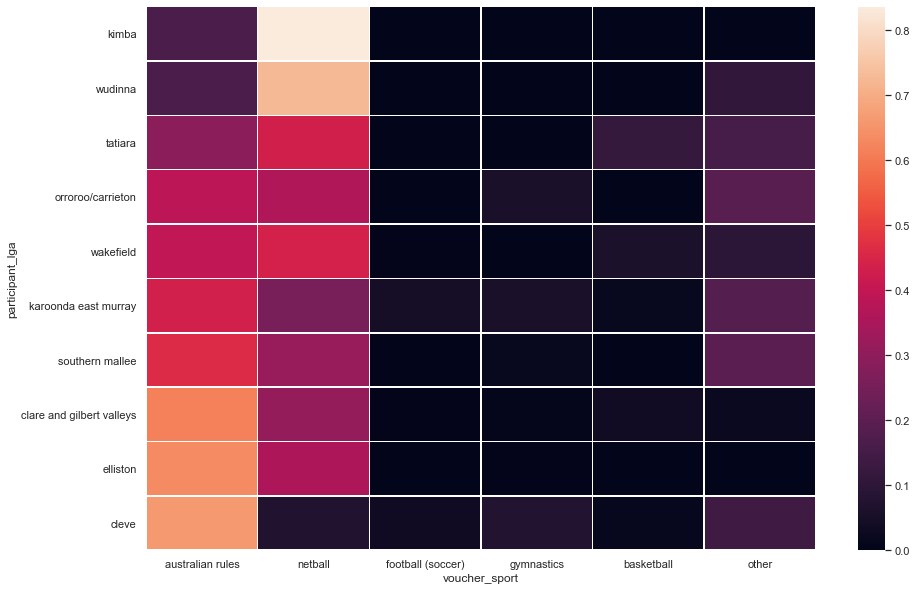

In [125]:
sns.heatmap(data= topClaims10.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

In [126]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0
tatiara,0.295802,0.433206,0.000000,0.000000,0.116412,0.154580,1.0
elliston,0.636364,0.357576,0.000000,0.006061,0.000000,0.000000,1.0
orroroo/carrieton,0.386861,0.364964,0.000000,0.058394,0.000000,0.189781,1.0
clare and gilbert valleys,0.616012,0.311342,0.005930,0.006672,0.037064,0.022980,1.0


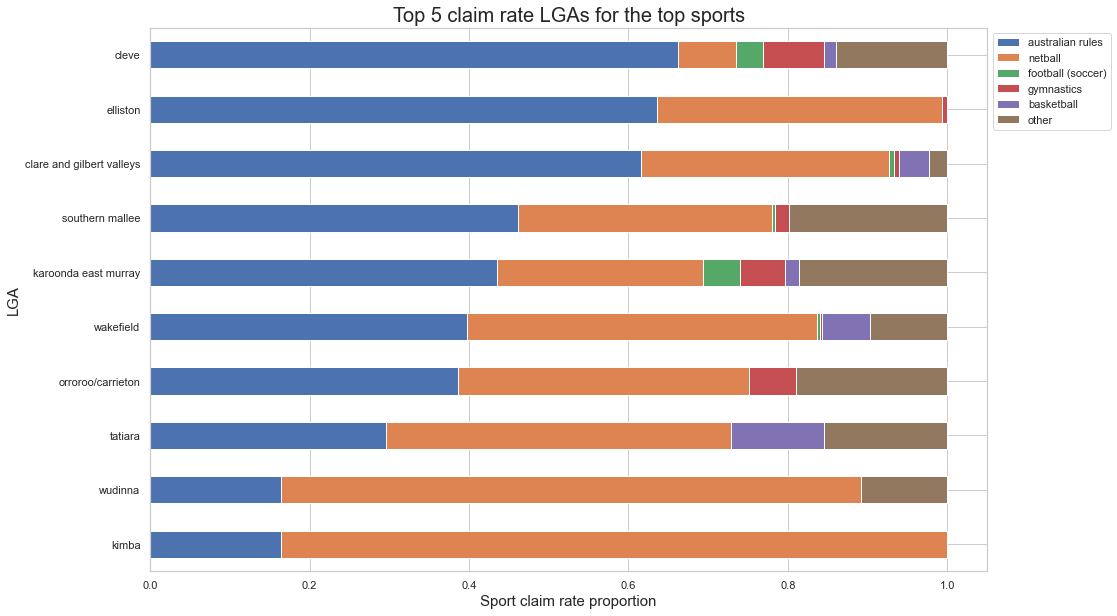

In [127]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims10.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.title('Top 5 claim rate LGAs for the top sports', size = 20)
plt.xlabel('Sport claim rate proportion', size = 15)
plt.ylabel('LGA', size=15)

plt.show()

Looks like there is a pattern that as australian rules popularity decreases, netball popularrity increases. 

# Question 3

 Are any LGAs over/under represented in their use of vouchers?

Check population to number of vouchers claimed. 

david : need to normalise the vouchers by population in some way 

### Getting the proportion of the population that claimed vouchers and showing top5 over and under represented lgas


In [128]:
allSportsClaim = pivot.sum(axis=1).to_frame(name='sum')

In [129]:
allSportsClaim

,sum
participant_lga,
adelaide,302.0
adelaide hills,4756.0
adelaide plains,899.0
alexandrina,2979.0
barossa,2874.0
...,...
west torrens,2844.0
whyalla,2488.0
wudinna,267.0


In [130]:
allSportsClaim['population'] = LGA_scores['population']

no pop number in seifa, then drop 

In [131]:
allSportsClaim = allSportsClaim.dropna()

In [132]:
allSportsClaim['proportion'] = allSportsClaim['sum'] / LGA_scores['population']

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
allSportsClaim['percentage'] = round(allSportsClaim['proportion']*100, 2)

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
allSportsClaim.sort_values(by= 'percentage', ascending = False)

,sum,population,proportion,percentage
participant_lga,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49
kimba,232.0,1087.0,0.213431,21.34
wudinna,267.0,1256.0,0.212580,21.26
cleve,329.0,1729.0,0.190283,19.03
southern mallee,342.0,2097.0,0.163090,16.31
...,...,...,...,...
campbelltown,2567.0,97060.0,0.026448,2.64
peterborough,45.0,1733.0,0.025967,2.60
coober pedy,39.0,1694.0,0.023022,2.30


We can determine which LGAs are over and under represented by checking the mean rate. We will assume that the LGAs that are above the mean claim rate are over represented and the LGAs below the mean claim rate are under represented. 

In [135]:
meanClaimRate = allSportsClaim['proportion'].sum() / allSportsClaim.shape[0]

In [136]:
overRep = allSportsClaim[allSportsClaim['proportion'] > meanClaimRate]

In [137]:
underRep = allSportsClaim[allSportsClaim['proportion'] < meanClaimRate]

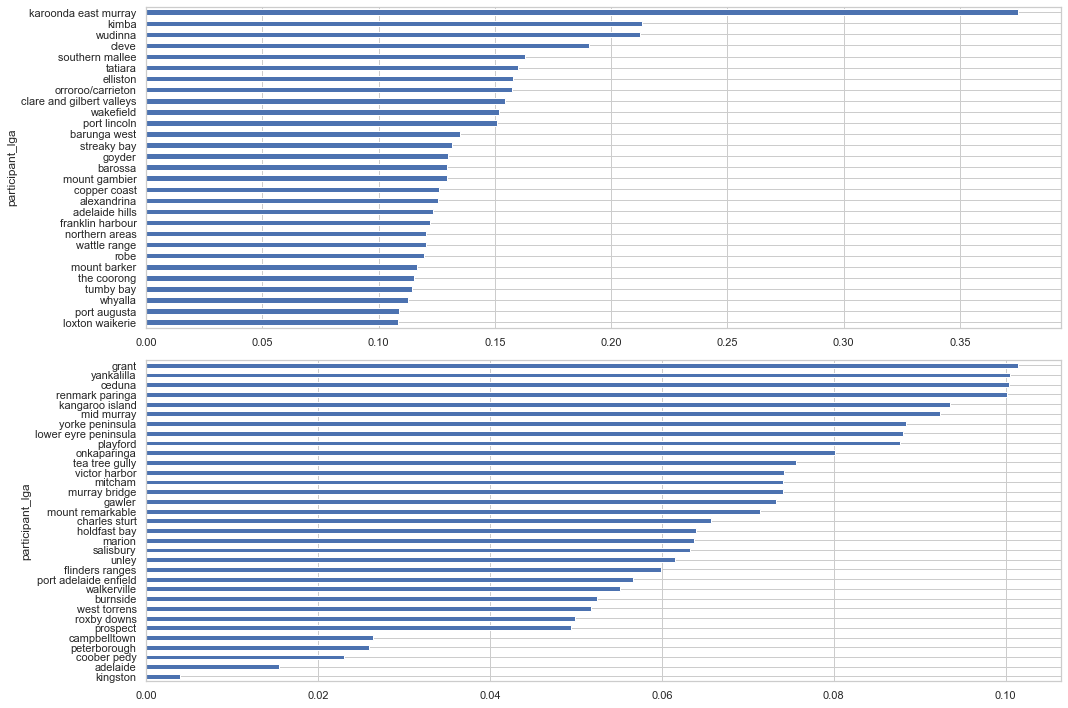

In [138]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

overRep['proportion'].sort_values(ascending=True).plot(kind='barh', ax = axes[0])
underRep['proportion'].sort_values(ascending=True).plot(kind='barh', ax = axes[1])

plt.tight_layout()

Looks like possible outliers being Karoonda East Murray and Kingston. 

check mean for overall or for each LGA to normalise it to check deviation from the avg

checking a distplot https://seaborn.pydata.org/generated/seaborn.distplot.html

C:\Users\Rudol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


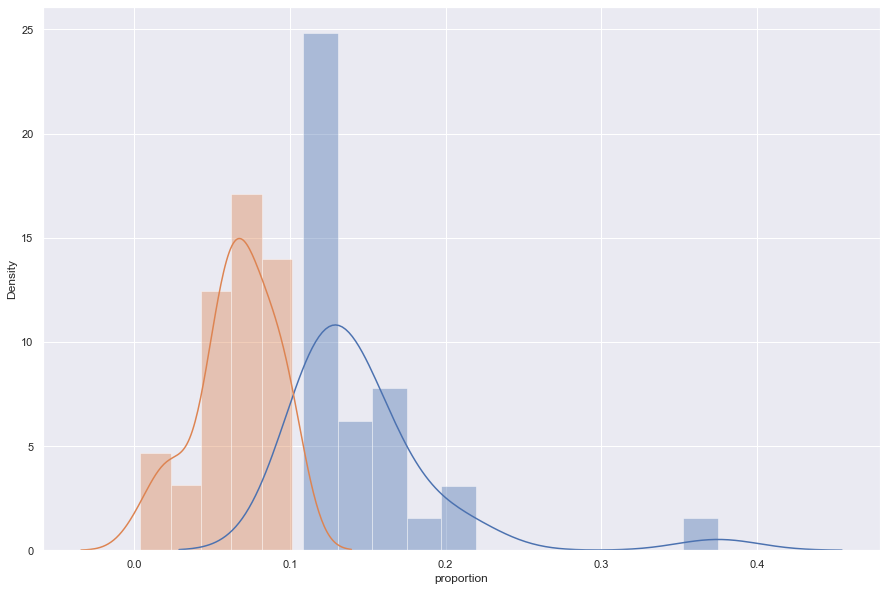

In [139]:
sns.set_theme(); np.random.seed(0)
sns.distplot(overRep['proportion'])
ax = sns.distplot(underRep['proportion'])

### Checking LGAs in SEIFA

In [140]:
sa_vouchers_scores

,participant_id,participant_suburb,club_previous_member,participant_atsi_indicator,participant_cald_indicator,participant_sex,voucher_value,club_name,voucher_sport,participant_lga,participant_electorate,voucher_completion_date,voucher_claim_year,ieo,ier,irsad,irsd,population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127521,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,15/8/16 1:33,2016,965.0,965.0,917.0,937.0,8134.0
127522,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,13/7/15 23:42,2015,965.0,965.0,917.0,937.0,8134.0
127523,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,30/6/17 6:07,2017,965.0,965.0,917.0,937.0,8134.0
127524,1127526,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,28/4/15 0:06,2015,965.0,965.0,917.0,937.0,8134.0


In [141]:
sa_vouchers_scores.columns = sa_vouchers_scores.columns.str.lower()

In [142]:
sa_vouchers_scores['participant_lga']= sa_vouchers_scores['participant_lga'].str.lower()

In [143]:
sa_vouchers_scores['voucher_sport']= sa_vouchers_scores['voucher_sport'].str.lower()

This shows the rows that have participant_lga being 'no lga', then we check what these 'no lga' correspond to in the participant_suburb column. We count the number of occurences for each that show up. 

In [144]:
list(pivot.index)

['adelaide',
 'adelaide hills',
 'adelaide plains',
 'alexandrina',
 'barossa',
 'barunga west',
 'berri barmera',
 'burnside',
 'campbelltown',
 'ceduna',
 'charles sturt',
 'clare and gilbert valleys',
 'cleve',
 'coober pedy',
 'copper coast',
 'elliston',
 'flinders ranges',
 'franklin harbour',
 'gawler',
 'goyder',
 'grant',
 'holdfast bay',
 'kangaroo island',
 'karoonda east murray',
 'kimba',
 'kingston',
 'light',
 'lower eyre peninsula',
 'loxton waikerie',
 'marion',
 'mid murray',
 'mitcham',
 'mount barker',
 'mount gambier',
 'mount remarkable',
 'murray bridge',
 'naracoorte lucindale',
 'no lga',
 'northern areas',
 'norwood payneham and st peters',
 'onkaparinga',
 'orroroo/carrieton',
 'peterborough',
 'playford',
 'port adelaide enfield',
 'port augusta',
 'port lincoln',
 'port pirie',
 'prospect',
 'renmark paringa',
 'robe',
 'roxby downs',
 'salisbury',
 'southern mallee',
 'streaky bay',
 'tatiara',
 'tea tree gully',
 'the coorong',
 'tumby bay',
 'unley',
 'v

# Question 4

 Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [145]:
LGA_scores['ieo']

LGA
adelaide            874.0
adelaide hills     1083.0
albany              999.0
albury              964.0
alexandrina        1000.0
                    ...  
yass valley        1088.0
yilgarn             998.0
york               1010.0
yorke peninsula     969.0
young               964.0
Name: ieo, Length: 556, dtype: float64

In [146]:
allSportsClaim_scores = allSportsClaim

In [147]:
allSportsClaim_scores['ieo'] = LGA_scores['ieo']
allSportsClaim_scores['ier'] = LGA_scores['ier']
allSportsClaim_scores['irsad'] = LGA_scores['irsad']
allSportsClaim_scores['irsd'] = LGA_scores['irsd']

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [148]:
allSportsClaim_scores

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
adelaide,302.0,19606.0,0.015403,1.54,874.0,874.0,1036.0,1013.0
adelaide hills,4756.0,38601.0,0.123209,12.32,1083.0,1083.0,1077.0,1081.0
alexandrina,2979.0,23693.0,0.125733,12.57,1000.0,1000.0,969.0,987.0
barossa,2874.0,22174.0,0.129611,12.96,1028.0,1028.0,997.0,1017.0
barunga west,333.0,2467.0,0.134982,13.50,981.0,981.0,940.0,954.0
...,...,...,...,...,...,...,...,...
west torrens,2844.0,54932.0,0.051773,5.18,949.0,949.0,989.0,998.0
whyalla,2488.0,22070.0,0.112732,11.27,905.0,905.0,897.0,905.0
wudinna,267.0,1256.0,0.212580,21.26,1008.0,1008.0,999.0,1023.0


In [149]:
allSportsClaim_scores.loc[list(allSportsClaim_scores['irsad'].nlargest(5).index)]

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
burnside,2213.0,42168.0,0.052481,5.25,1044.0,1044.0,1090.0,1081.0
roxby downs,234.0,4694.0,0.049851,4.99,1066.0,1066.0,1086.0,1096.0
adelaide hills,4756.0,38601.0,0.123209,12.32,1083.0,1083.0,1077.0,1081.0
walkerville,386.0,7008.0,0.055080,5.51,1029.0,1029.0,1076.0,1065.0
unley,2266.0,36813.0,0.061554,6.16,1013.0,1013.0,1071.0,1065.0


In [150]:
allSportsClaim_scores.loc[list(allSportsClaim_scores['irsad'].nsmallest(5).index)]

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
peterborough,45.0,1733.0,0.025967,2.60,873.0,873.0,808.0,798.0
playford,6940.0,79082.0,0.087757,8.78,914.0,914.0,868.0,871.0
coober pedy,39.0,1694.0,0.023022,2.30,870.0,870.0,869.0,870.0
murray bridge,1462.0,19742.0,0.074055,7.41,932.0,932.0,887.0,901.0
port augusta,1522.0,13978.0,0.108885,10.89,917.0,917.0,897.0,906.0


### relation between vouchers claimed and scores via table


I can't see a relation in the above tables if voucher claim proportion is related to any of the scores

should I be plotting something? 

In [151]:
allSportsClaim_scores

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
adelaide,302.0,19606.0,0.015403,1.54,874.0,874.0,1036.0,1013.0
adelaide hills,4756.0,38601.0,0.123209,12.32,1083.0,1083.0,1077.0,1081.0
alexandrina,2979.0,23693.0,0.125733,12.57,1000.0,1000.0,969.0,987.0
barossa,2874.0,22174.0,0.129611,12.96,1028.0,1028.0,997.0,1017.0
barunga west,333.0,2467.0,0.134982,13.50,981.0,981.0,940.0,954.0
...,...,...,...,...,...,...,...,...
west torrens,2844.0,54932.0,0.051773,5.18,949.0,949.0,989.0,998.0
whyalla,2488.0,22070.0,0.112732,11.27,905.0,905.0,897.0,905.0
wudinna,267.0,1256.0,0.212580,21.26,1008.0,1008.0,999.0,1023.0


check a correlation matrix. 

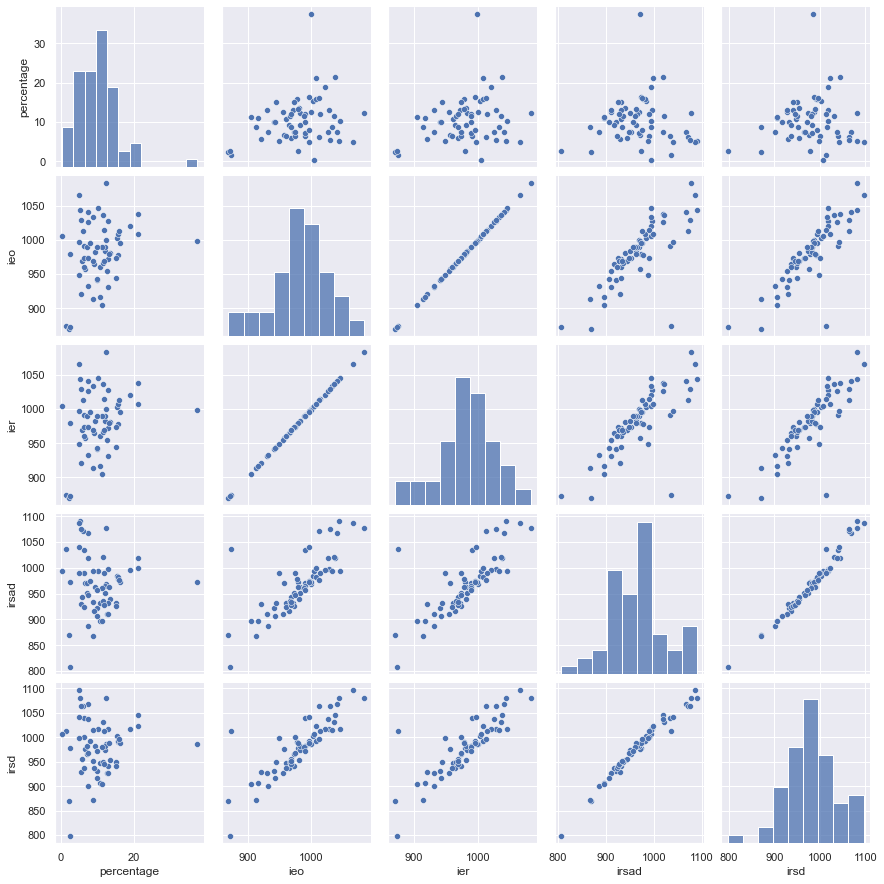

In [152]:
sns.pairplot(allSportsClaim_scores[list(allSportsClaim_scores.columns[-5:])])

Don't really see any relation between claim rate (percentage or proportion) and the scores. We could use LR to see if there are any relationship between the scores and claim rate. 

Checking correlation / heatmap

In [153]:
myList = list(allSportsClaim_scores.columns[-4:])

In [154]:
myList.append('proportion')

In [155]:
myList

['ieo', 'ier', 'irsad', 'irsd', 'proportion']

plotting the correlation matrix as a heatmap to visually see if there are any correlations between the claim rate and the scores

<AxesSubplot:>

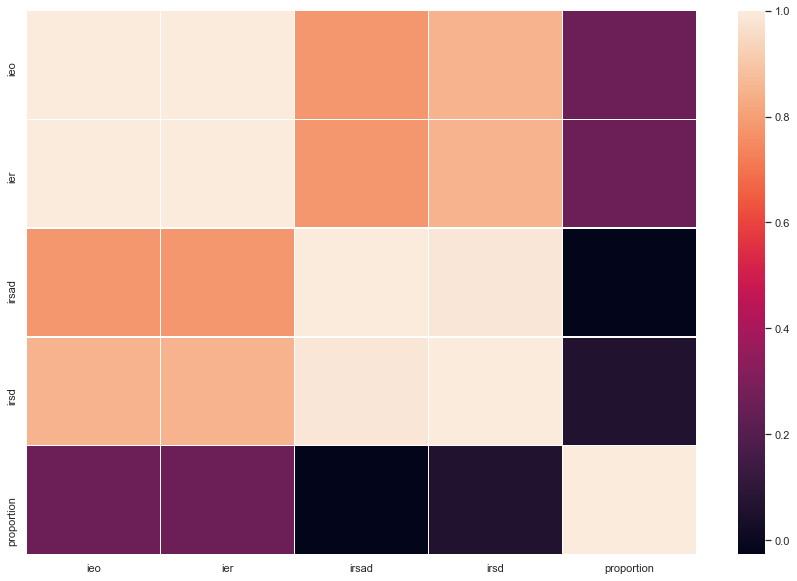

In [156]:
sns.heatmap((allSportsClaim_scores[myList].corr()), linewidths = 0.5)

In [157]:
allSportsClaim_scores.corr()

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
sum,1.000000,0.909829,-0.211298,-0.211407,-0.000399,-0.000399,0.044818,0.026067
population,0.909829,1.000000,-0.389840,-0.389941,-0.035736,-0.035736,0.092233,0.055094
proportion,-0.211298,-0.389840,1.000000,1.000000,0.254972,0.254972,-0.026474,0.064524
percentage,-0.211407,-0.389941,1.000000,1.000000,0.254995,0.254995,-0.026467,0.064529
ieo,-0.000399,-0.035736,0.254972,0.254995,1.000000,1.000000,0.781360,0.848105
ier,-0.000399,-0.035736,0.254972,0.254995,1.000000,1.000000,0.781360,0.848105
irsad,0.044818,0.092233,-0.026474,-0.026467,0.781360,0.781360,1.000000,0.985054
irsd,0.026067,0.055094,0.064524,0.064529,0.848105,0.848105,0.985054,1.000000


This refers to all LGAs though, would it be different if we look at a single LGA? The question says to check if there is a relationship between claim and and an LGA

In [158]:
allSportsClaim_scores.nlargest(1, columns= 'proportion')

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49,999.0,999.0,972.0,986.0


checking the proportion row and the scores, we can't really see a relationship. 

Can try to explore it, pearson / spearman correlation, can also try to use machine learning to find correlation, check correlation matrix. 


if you cluster on the sports, can find that what regions have the most claims for the specific sports in those areas. 

Checking the pearsons and spearman's correlation:
- measure of skewness.
- pearson = 0 does not necessarily mean the variables are not correlated. 
- spearman = when the data contains outliers, use spearmans rank correlation. This will use the ranks of the data rather than the actual values. 

In [159]:
data = pd.DataFrame({'X':[10,20,30,40,1000], 'Y':[-70, -1000, -50, -10, -20]})

In [160]:
data.corr(method = 'pearson')

,X,Y
X,1.000000,0.279732
Y,0.279732,1.000000


In [161]:
data.corr(method = 'spearman')

,X,Y
X,1.0,0.8
Y,0.8,1.0


# Challenge Question: Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

### setting up the DFs

In [162]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [163]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RCS]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,ieo,ier,irsad,irsd,population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,NaN,NaN,NaN,NaN,NaN
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN


In [164]:
qld_vouchers_scores = qld_vouchers_scores.rename(columns = {'Participation Activity':'sport'})

In [165]:
qld_vouchers_scores['sport'] = qld_vouchers_scores['sport'].str.lower()
qld_vouchers_scores['LGA'] = qld_vouchers_scores['LGA'].str.lower()

qld_vouchers_scores.columns  = qld_vouchers_scores.columns.str.lower()

In [166]:
qldGroup = (qld_vouchers_scores.groupby(['lga','sport']).count()).copy(deep=True)

In [167]:
qldGroup.head()

application number  voucher number  \
lga            sport                                                   
banana         equestrian                          1               1   
               football (soccer)                   1               1   
               netball                             1               1   
blackall tambo athletics                           2               2   
               rugby league                        1               1   

                                  child age (at time of application)  gender  \
lga            sport                                                           
banana         equestrian                                          1       0   
               football (soccer)                                   1       0   
               netball                                             1       0   
blackall tambo athletics                                           2       0   
               rugby league                                        1       0   

                                  has your child played sport before?  \
lga            sport                                                    
banana         equestrian                                           1   
               football (soccer)                                    1   
               netball                                              1   
blackall tambo athletics                                            2   
               rugby league                                         1   

                                  club name  club suburb/town  \
lga            sport                                            
banana         equestrian                 1                 1   
               football (soccer)          1                 1   
               netball                    1                 1   
blackall tambo athletics                  2                 2   
               rugby league               1                 1   

                                  club local government area name  \
lga            sport                                                
banana         equestrian                                       1   
               football (soccer)                                1   
               netball                                          1   
blackall tambo athletics                                        2   
               rugby league                                     1   

                                  club state electoral district  name  \
lga            sport                                                    
banana         equestrian                                           1   
               football (soccer)                                    1   
               netball                                              1   
blackall tambo athletics                                            2   
               rugby league                                         1   

                                  parent suburb/town  total payment  ieo  ier  \
lga            sport                                                            
banana         equestrian                          1              1    0    0   
               football (soccer)                   1              1    0    0   
               netball                             1              1    0    0   
blackall tambo athletics                           2              2    0    0   
               rugby league                        1              1    0    0   

                                  irsad  irsd  population  
lga            sport                                       
banana         equestrian             0     0           0  
               football (soccer)      0     0           0  
               netball                0     0           0  
blackall tambo athletics              0     0           0  
               rugby league           0     0           0

In [168]:
qldSports = pd.pivot_table(qldGroup, values = 'voucher number', index = 'lga', columns = 'sport')

In [169]:
qldSports = qldSports.fillna(0)

### matching the sport names to those in SA

There are a different number of sports in both states

In [170]:
print(f'Number of sports in QLD: {len(qldSports)}')

Number of sports in QLD: 45


In [171]:
print(f'Number of sports in SA: {len(pivot)}')

Number of sports in SA: 69


I want to find out which sports are the same. 

In [172]:
sameSports = [] 

for val in list(qldSports.columns):
    if val in list(pivot.columns):
        sameSports.append(val)

print(f' There are {len(sameSports)} common sports in both states')

 There are 32 common sports in both states


Checking what sports are different in QLD and SA


In [173]:
pivot.columns[~pivot.columns.isin(sameSports)]

Index(['australian rules', 'bmx', 'badminton', 'bowls', 'diving', 'fencing',
       'kung fu (wu shu)', 'lacrosse', 'motor sport', 'motorcycling',
       'orienteering', 'paralympics', 'pony clubs', 'surf lifesaving',
       'surf riding', 'volleyball', 'water polo', 'wrestling'],
      dtype='object', name='voucher_sport')

In [174]:
qldSports.columns[~qldSports.columns.isin(list(set(pivot.columns)))]

Index(['*other', 'australian football', 'bmx bicycle motocross',
       'body boarding', 'bowls lawn', 'boxing', 'broomball', 'bushwalking',
       'canoeing outrigger', 'cheerleading', 'disability sports',
       'dragon boating', 'futsal', 'ice hockey', 'inline hockey', 'karting',
       'kayaking', 'life saving surf', 'mixed martial arts', 'motor cycling',
       'oztag', 'parkour', 'polocrosse', 'pony club',
       'riding for the disabled', 'rock climbing', 'skipping', 'surfing',
       'swimming synchronised', 't-ball', 'tenpin bowling',
       'trail bike riding', 'trampolining', 'zen do kai martial arts'],
      dtype='object', name='sport')

We can see there are a few common sports that still remain but they are spelled differently. We will have to fix those manually. 

Renaming the columns that are different in the DFs 

In [175]:
qldSports = qldSports.rename(columns= {'australian football' : 'australian rules', 'bmx bicycle motocross': 'bmx',
                                      'bowls lawn': 'bowls', 'disability sports': 'paralympics', 'motor cycling': 'motorcycling',
                                      'pony club': 'pony clubs', 'surfing':'surf riding'})

Now that we've renamed the columns, can find the similar columns with the loop again. 

In [176]:
sameSports2 = [] 

for val in list(qldSports.columns):
#     print(val)
    if val in list(pivot.columns):
#         print(val)
        sameSports2.append(val)

print(f' There are {len(sameSports2)} common sports in both states')

 There are 39 common sports in both states


In [177]:
len(sameSports2)

39

In [178]:
qldSports.columns

Index(['*other', 'archery', 'athletics', 'australian rules', 'baseball',
       'basketball', 'bmx', 'body boarding', 'bowls', 'boxing', 'broomball',
       'bushwalking', 'calisthenics', 'canoeing outrigger', 'cheerleading',
       'cricket', 'cycling', 'dancesport', 'paralympics', 'dragon boating',
       'equestrian', 'football (soccer)', 'futsal', 'golf', 'gymnastics',
       'hockey', 'ice hockey', 'ice skating', 'inline hockey', 'ju jitsu',
       'judo', 'karate', 'karting', 'kayaking', 'life saving surf',
       'mixed martial arts', 'motorcycling', 'netball', 'oztag', 'parkour',
       'polocrosse', 'pony clubs', 'riding for the disabled', 'rock climbing',
       'roller sports', 'rowing', 'rugby league', 'rugby union', 'sailing',
       'shooting', 'skipping', 'softball', 'squash', 'surf riding', 'swimming',
       'swimming synchronised', 't-ball', 'table tennis', 'taekwondo',
       'tennis', 'tenpin bowling', 'touch', 'trail bike riding',
       'trampolining', 'weightlift

In [179]:
qld_otherSportsList = qldSports.columns[~qldSports.columns.isin(sameSports2)]

In [180]:
qldSports.columns[~qldSports.columns.isin(sameSports2)]

Index(['*other', 'body boarding', 'boxing', 'broomball', 'bushwalking',
       'canoeing outrigger', 'cheerleading', 'dragon boating', 'futsal',
       'ice hockey', 'inline hockey', 'karting', 'kayaking',
       'life saving surf', 'mixed martial arts', 'oztag', 'parkour',
       'polocrosse', 'riding for the disabled', 'rock climbing', 'skipping',
       'swimming synchronised', 't-ball', 'tenpin bowling',
       'trail bike riding', 'trampolining', 'zen do kai martial arts'],
      dtype='object', name='sport')

In [219]:
otherDf= qldSports[qld_otherSportsList].sum(axis=1)

In [220]:
qldSportsClean = qldSports[sameSports2]

In [221]:
qldSportsClean.head()

sport,archery,athletics,australian rules,baseball,basketball,bmx,bowls,calisthenics,cricket,cycling,...,shooting,softball,squash,surf riding,swimming,table tennis,taekwondo,tennis,touch,weightlifting
lga,,,,,,,,,,,,,,,,,,,,,
banana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blackall tambo,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brisbane,0.0,1.0,68.0,3.0,78.0,5.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,48.0,0.0,5.0,5.0,0.0,0.0
bundaberg,0.0,3.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
burdekin,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
qldSportsClean= qldSportsClean.append([otherDf])

In [217]:
sameSports2

['archery',
 'athletics',
 'australian rules',
 'baseball',
 'basketball',
 'bmx',
 'bowls',
 'calisthenics',
 'cricket',
 'cycling',
 'dancesport',
 'paralympics',
 'equestrian',
 'football (soccer)',
 'golf',
 'gymnastics',
 'hockey',
 'ice skating',
 'ju jitsu',
 'judo',
 'karate',
 'motorcycling',
 'netball',
 'pony clubs',
 'roller sports',
 'rowing',
 'rugby league',
 'rugby union',
 'sailing',
 'shooting',
 'softball',
 'squash',
 'surf riding',
 'swimming',
 'table tennis',
 'taekwondo',
 'tennis',
 'touch',
 'weightlifting']

In [218]:
list((qldSportsClean.T).columns)

['archery',
 'athletics',
 'australian rules',
 'baseball',
 'basketball',
 'bmx',
 'bowls',
 'calisthenics',
 'cricket',
 'cycling',
 'dancesport',
 'paralympics',
 'equestrian',
 'football (soccer)',
 'golf',
 'gymnastics',
 'hockey',
 'ice skating',
 'ju jitsu',
 'judo',
 'karate',
 'motorcycling',
 'netball',
 'pony clubs',
 'roller sports',
 'rowing',
 'rugby league',
 'rugby union',
 'sailing',
 'shooting',
 'softball',
 'squash',
 'surf riding',
 'swimming',
 'table tennis',
 'taekwondo',
 'tennis',
 'touch',
 'weightlifting',
 0]

In [197]:
qldSportsClean

,archery,athletics,australian rules,baseball,basketball,bmx,bowls,calisthenics,cricket,cycling,...,scenic rim,somerset,south burnett,southern downs,sunshine coast,tablelands,toowoomba,townsville,western downs,whitsunday
banana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blackall tambo,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brisbane,0.0,1.0,68.0,3.0,78.0,5.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bundaberg,0.0,3.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
burdekin,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cairns,0.0,17.0,24.0,1.0,12.0,0.0,0.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cassowary coast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
central highlands,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charters towers,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
douglas,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
pivot.columns[~pivot.columns.isin(sameSports2)]

Index(['badminton', 'diving', 'fencing', 'kung fu (wu shu)', 'lacrosse',
       'motor sport', 'orienteering', 'surf lifesaving', 'volleyball',
       'water polo', 'wrestling'],
      dtype='object', name='voucher_sport')

now we have the columns with same sports, we want to save those columns in the DF and put the rest of the uncommon sports as 'other'

In [184]:
qld = qldSports[sameSports2]